# Discussion 03 - Classification, Feed-Forward Neural Networks, Backpropagation

### Goals

<!-- - What is Classification? -->
- Maximum Likelihood Estimation for Logistic Regression
- Newton's Method
- Single Perceptron Model
- Multi-layer Perceptron Model
- Data Pre-processing
    - Normalization
    - One-hot Encoding
- Activation Function
    - Sigmoid
    - ReLU
    - Leaky ReLU
    
Instructor : Bharath Kinnal

<!-- ## What is Classification
Classification is to a predictive modeling problem where a given example of input data is predicted to be in a particular category. To model a classifier, a training dataset is required with many examples of inputs and outputs from which to learn. There are four main types of classification models :

- __Binary Classifier :__
    Classifies the input data into one of 2 classes
- __Multi-Class Classifier :__
    Classifies the input data into one of multiple classes
- __Multi-Label Classifier :__
    Classifies the input data into one or more classes
- __Imbalanced Classifier :__
    Similar to binary classifiers, but the majority of training data belong to one class while a minority of the training data belong to the other class.

It can be seen that Logistic Regression is an example of a binary classifier. -->

## Maximum Likelihood Estimation for Logistic Regression

Binary classification using logistic regression mainly involves using the sigmoid function to find the probabilities of the output data to be either 0 and 1. For the model to accurately predict output variable as 0 or 1, we need to find the best fit sigmoid curve, that is, we need to create an efficient boundary between the 0 and 1 values. A cost function which maximizes the likelihood of getting desired output values, is called as Maximum Likelihood Estimation (MLE) function.


Given the input data $x_i$, the probability of getting the output $y_i$ will be $p(y_i|x_i,w_i) = (g(x_i, w_i))^{y_i} \cdot (1 - g(x_i, w_i))^{1 - y_i}$, where $g()$ is the sigmoid function. So, for all input data $X = [x_1, x_2, \dots, x_n]$, the likelihood/probability of getting the output vector $Y = [y_1, y_2, \dots, y_n]$ is given below :

$$\text{Likelihood, }P(Y|X,W) = \prod^{n}_{i=1} (g(x_i, w_i))^{y_i} \cdot (1 - g(x_i, w_i))^{1 - y_i}$$

$$\text{Log-Likelihood, }l(W) = log(P(Y|X,W)) = \sum^{n}_{i=1} y_i log(g(x_i, w_i)) + (1 - y_i) log(1 - g(x_i, w_i))$$

Optimizing the regression model involves maximizing the value of $l(W)$. This can be done by updating the weights through gradient descent (or ascent) as follows :

$$w^{n+1}_{i} = w^{n}_i + \alpha(y_i - g(x_i,w^{n}_i))x_i$$

where $\alpha$ is the learning rate. The weight $w_i$ is updated until convergence is reached.

In [2]:
#Program to find numbers > 5
import pandas as pd
import numpy as np

#Sigmoid Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def combination_function(X,W) :
    if X.ndim == 1 :
        Z = W * X
    else :
        Z = np.dot(X, W)
    return Z

#Log-Likelihood Function
def log_likelihood(X, Y, W):
    Z = combination_function(X,W)
    #Z = np.dot(X, W)
    ll = np.sum( Y*np.log(sigmoid(Z)) + (1-Y)*(1 - np.log(sigmoid(Z))))
    return ll

#Logistic Regression Function
def logistic_regression(X, Y, num_steps = 500, learning_rate = 0.1, add_intercept = True):
    if add_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.column_stack((intercept, X))
    
    print(X.shape)
    
    if X.ndim == 1 :
        weights = np.zeros(1)
    else :
        weights = np.zeros(X.shape[1])
    
    for step in range(num_steps):
        scores = combination_function(X,weights)
        predictions = sigmoid(scores)
        
        #print(predictions)
        # Update weights with gradient
        output_error_signal = Y - predictions
        gradient = np.dot(output_error_signal.T, X)
        weights += learning_rate * gradient
        
        
    return X, weights

X = np.linspace(-10, 10, 21)
y = np.ones(21)
y[:16] = 0

w = np.zeros(21)
y_pred = sigmoid(combination_function(X,w))

X, w = logistic_regression(X,y)
print(log_likelihood(X, y, w))
#print(w)


y_pred = sigmoid(combination_function(X,w))

X = X[:, 1]

(21, 2)
292.1237916181633


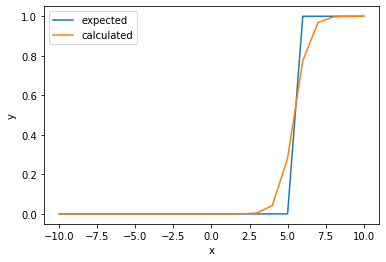

In [3]:
import matplotlib.pyplot as plt

plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(X, y, label = 'expected') 
plt.plot(X, y_pred, label = 'calculated') 
plt.legend()
plt.show()

### Newton's Method
In order to find a value of $w$ such that the log-likelihood $l(w)$ is maximum, the first-order derivative $l'(w) = 0$. Newton's Method (or Newton-Raphson Method) is a root-finding algorithm that uses the first few terms of the Taylor series of the function $l(w)$ about a point $w$. Starting with an arbitrary weight $w^0_i$, the weight can be optimized to give better value of $l(w_i)$ using the following update rule :

$$w_i^{n+1} = w_i^{n} + \eta \frac{\frac{\delta l(w_i)}{\delta w_i}}{\frac{\delta^2 l(w_i)}{(\delta w_i)^2}}$$

An intuitive explanation can be shown in the following representation below. Here, considering the function $f(x) = l'(x)$, we can see that the value of $l'(x)$ converges to 0 at $x = x_5$.

![](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)



## Single Perceptron Model

The perceptron model calculates the weighted sum of the input, and then returns 1 if the weighted sum is more
than a threshold, or less returns 0.

Given an input $X = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}$ to a single perceptron, the output $y$ can be calcluated as follows :

$$z = W^T X = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$$

$$y = \begin{cases}
      1 & \text{if $z \ge threshold$}\\
      0 & \text{if $z < threshold$}
    \end{cases}$$

Here, $W = \begin{pmatrix} w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_n \end{pmatrix}$ are the weights asssociated with the perceptron, and they are the parameters that need to be optimized during training. 

The weights are updated in each iteration (epoch) as follows :

$$w^{n+1}_{i} = w^{n}_i + \alpha(y_i - g(x_i,w^{n}_i))x_i$$

The weight $w_0$ is the __bias__ associated with the perceptron, which allows the perceptron to give a non-zero output even when the input is 0.

The Perceptron and Logistic Regression models are motivated from two very different directions. Perceptron is essentially defined by its update rule. If the data are linearly separable, perceptron is guaranteed to converge, as the perceptron makes non-zero (and non-vanishing) progress towards a separating solution on every update. 

By contrast, logistic regression is instead motivated from a probabilistic perspective, and the update comes from taking the gradient. Gradient-based optimization techniques are guaranteed to converge, but the likelihood can never truly be maximized with a finite set of weights.

In [135]:
#Single Perceptron Model for AND gate

X = np.asarray([[0,0], [0,1], [1,0], [1,1]])
AND_gate = [0, 0, 0, 1]
OR_gate = [0, 1, 1, 1]
XOR_gate = [0, 1, 1, 0]
w = [0,0,0]

def feed_forward(x, w) :
    thresh = 1
    
    z = np.dot(x,w)
    #sum([x[i] * w[i] for i in range(len(x))])
    #z += w[-1]
    
    y = 1 * (z>thresh)
    #print(y)
    return y

def train(X, w, expected, alpha = 0.1, epoch = 50) :
    X = np.column_stack((np.ones(X.shape[0]), X))
    #print(X)
    accuracy = 0
    for n in range(epoch) :
#         for i in range(len(X)) :
#             x = X[i]
#             # Add bias
#             np.insert(x,0,1)
#             print(x)

        y = feed_forward(X,w)

        w = w + alpha * np.dot((expected - y), X)
        #w = [w[j] + alpha * (expected[i] - y) * x[j] for j in range(len(x))]
        #print('Loss = ', expected - y)
        #print('Weights = ', w)
        
        accuracy = (4 - abs(sum(expected - y)))/4
    
    print('Loss = ', expected - y)
    print('Weights = ', w)
    print('Final Accuracy = ', accuracy)
    #display_linear_separation(X,w,)

print('AND Gate')
train(X,w, AND_gate)
print('OR Gate')
train(X,w, OR_gate)
print('XOR Gate')
train(X,w, XOR_gate)


AND Gate
Loss =  [0 0 0 0]
Weights =  [0.4 0.4 0.4]
Final Accuracy =  1.0
OR Gate
Loss =  [0 0 0 0]
Weights =  [0.8 0.5 0.5]
Final Accuracy =  1.0
XOR Gate
Loss =  [-1  0  0 -1]
Weights =  [9.00000000e-01 2.77555756e-17 2.77555756e-17]
Final Accuracy =  0.5


## Multi-Layer Perceptron Model
A neural network, also called a Multi-Layer-Perceptron (MLP), consists of a layered, feedforward, completely-connected network of neurons. There are mainly 3 types of layers in a neural network :
- __Input layer :__ The number of nodes depends on the number and types of dataset attributes
- __Output layer :__ The number of nodes may be more than 1 depending on the classification task.
- __Hidden layer :__ The number of nodes depends on the complexity of the pattern, and is determined mainly through trial and error. A neural network without a hidden layer is a perceptron model. 

<!-- A Feed-Forward NN (FFNN) is composed of two or more layers, but mostly 3 layers, with activation functions usually step or logistic function.  -->
The activation function in NN makes them non-linear regressors. A NN without an activation function is a linear regressor. The final layer can be another logistic regression/perceptron or a linear regression model depending whether it is a classification or regression problem.



Given an input $X = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}$ to a neuron, the output $y$ can be calcluated as follows :

$$z = W^T X = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$$

$$y = Act(z)
%     \begin{cases}
%       1 & \text{if $Act(z) \ge threshold$}\\
%       0 & \text{if $ < threshold$}
%     \end{cases}$$

Here, $Act()$ is the activation function used by the neuron, and $W = \begin{pmatrix} w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_n \end{pmatrix}$ are the weights associated with the neuron. 

Here's an example of a multi-layer perceptron classifier using sklearn. Here, we will use the Iris dataset and MLPClassifier function from the Sci-Kit Learn library.

<!-- Load the input data `X` and output class data `y` from the Iris dataset, and split it into training and testing data (usually a 70:30 or 80:20 split).  -->

In [121]:
import pandas as pd
from sklearn.datasets import load_iris

iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc_X = MinMaxScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.fit_transform(X_test)

In [198]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32),activation="relu",solver = 'sgd', max_iter = 2000, random_state=1)
clf.fit(X_trainscaled, y_train)
y_pred = clf.predict(X_testscaled) 
print(clf.score(X_testscaled, y_test))

0.9333333333333333


## Data Pre-processing
In this section, we will be discussing about how and why the input data is processed before it is passed through the classifier. It is used to make the data readable to the classifier, and to make each feature equally important for classification. In general, all attributes (continuous and categorical variables) must be encoded in a standardized manner, taking values between 0 and 1.



### Min-Max Normalization
Min-max normalization is a data normalization technique that scales numeric data between the range 0 to 1. For any continuous variable $x$ lying within the range $[x_{min}, x_{max}]$, the scaled variable $x_{scaled}$ can be calculated as follows :
$$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

In [84]:
# Example for min-max normalization :
#from sklearn.preprocessing import MinMaxScaler

import numpy as np
def min_max_normalization(x) :
    x_min = min(x)
    x_max = max(x)
    x = [(a - x_min)/(x_max - x_min) for a in x]
    return x

grades = [100, 90, 85, 70, 50]
print(grades)
print(min_max_normalization(grades))


[100, 90, 85, 70, 50]
[1.0, 0.8, 0.7, 0.4, 0.0]


### One-Hot Encoding
One hot encoding is a data processing method to convert each categorical value as a vector of binary values, where only the index of the observed category is set to 1. One of the main reasons why categorical data needs to be one-hot encoded is that categorical data is unreadable to most machine learning model.

There are 2 steps involved while converting categorical data into one-hot binary arrays
- Assign each unique category value to an integer value.
- Assign a new binary vector for each unique integer value.

In [54]:
from numpy import array 
from numpy import argmax 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
 
myData = [ 'dog' , 'cat' , 'sheep' , 'lizard' , 'lizard' , 'cat' , 'lizard' , 'dog' , 'dog' , 'cow' ]
 
# convert to an array
myData = array(myData)
print(myData)

# encode as integers
myData_encoder = LabelEncoder()
myData_encoded =  myData_encoder.fit_transform(myData) 
print (myData_encoded)
 
# binary encode
onehot_encoder = OneHotEncoder(sparse=False) # disable sparse return type
# reshape the array
myData_encoded = myData_encoded.reshape(len(myData_encoded), 1) 
onehot_encoded = onehot_encoder.fit_transform(myData_encoded) 
 
print(onehot_encoded)

['dog' 'cat' 'sheep' 'lizard' 'lizard' 'cat' 'lizard' 'dog' 'dog' 'cow']
[2 0 4 3 3 0 3 2 2 1]
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


/home/bharath/intel/intelpython3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## Activation Function
An activation function is a mathematical function that controls the output of a neural network. Activation functions help in determining whether a neuron is to be fired or not. Some popular activation functions are :
- Sigmoid Function
- ReLU
- Leaky ReLU

Activation is responsible for adding non-linearity to the output of a neural network model. Without an activation function, a neural network is simply a linear regression.



#### Sigmoid Function
It's an activation function that returns a value between 0 and 1. 

In [4]:
import numpy as np 
def sig(x):
    return 1/(1 + np.exp(-x))

One of the disadvantages of the sigmoid function is that towards the end regions the Y values respond very less to the change in X values. This results in a problem known as the vanishing gradient problem, which slows down the learning process and hence is undesirable.

#### Rectified Linear Unit (ReLU)
The ReLU activation function returns 0 if the input is negative otherwise return the input as it is.

In [5]:
def relu(x):
    return 0.2 * x * (x > 0)

The problem with ReLU is that the gradient for negative inputs comes out to be zero. This again leads to the problem of vanishing gradient (zero-gradient) for negative inputs.

#### Leaky ReLU
The ReLU activation function returns 0 if the input is negative otherwise return the input as it is.

In [6]:
def leaky_relu(x):
    return (0.2 * x * (x >= 0)) + ((0.1 * x) * (x < 0))

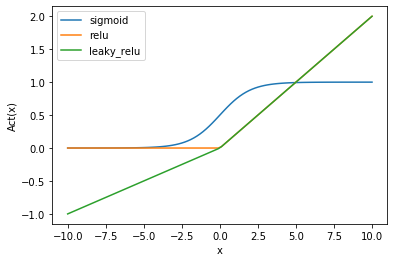

In [138]:
import matplotlib.pyplot as plt
#plt.ion()

x = np.linspace(-10, 10, 100)   
s = sig(x)

plt.plot(x, s, label = 'sigmoid') 
#plt.show()
#plt.pause(0.0001)
#plt.clf()

r = relu(x)
lr = leaky_relu(x)
plt.xlabel("x") 
plt.ylabel("Act(x)")  
plt.plot(x, r, label = 'relu') 
plt.plot(x, lr, label = 'leaky_relu') 
plt.legend()
plt.show()

<!-- ## Training and Tetsing a Neural Network -->

In [249]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# X, y = make_classification(n_samples=100, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
# clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
# clf.predict_proba(X_test[:1])
# #array([[0.038..., 0.961...]])
# clf.predict(X_test[:5, :])
# clf.score(X_test, y_test)

In [192]:
# from sklearn.metrics import confusion_matrix
# #rom sklearn.metrics import plot_confusion_matrix
# import matplotlib.pyplot as plt

# labels = ["Setosa","Versicolor","Virginica"]
# fig=confusion_matrix(y_pred, y_test)
# #fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
# plt.show()